## This script contains:

##### 1. Install the Quandl library and register for a Quandl account as described in the Exercise.
##### 2. Find a data set to work and import it into your Jupyter notebook.
##### 3. Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.
##### 4. Create a line chart of your data.
##### 5. Decompose the data’s components.
##### 6. Conduct a Dickey-Fuller test to check for stationarity.
##### 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.
##### 8. If your data still isn’t stationary, perform another round of differencing and repeat step 6.
##### 9. Check your data’s autocorrelations.

### 1. Install the Quandl library and register for a Quandl account as described in the Exercise.

In [42]:
# Importing libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [43]:
# Configuring API key 
quandl.ApiConfig.api_key = 'ysqoz9pvHFUoyiYkiWom'

### 2. Find a data set to work and import it into your Jupyter notebook.

In [44]:
# Importing the "Geothermal Power Capacity - Total Europe" data series
data = quandl.get('BP/GEO_CAP_EUR')

Geothermal energy is thermal energy in the Earth's crust. It combines energy from the formation of the planet and from radioactive decay.

In [45]:
# Checking data
data.head

<bound method NDFrame.head of                Value
Date                
1990-12-31   617.600
1995-12-31   710.900
2000-12-31   794.000
2001-12-31   807.000
2002-12-31   902.000
2003-12-31   940.000
2004-12-31   875.200
2005-12-31   933.100
2006-12-31  1142.100
2007-12-31  1207.900
2008-12-31  1304.900
2009-12-31  1380.900
2010-12-31  1430.900
2011-12-31  1555.200
2012-12-31  1612.200
2013-12-31  1773.200
2014-12-31  1909.265
2015-12-31  2128.265
2016-12-31  2327.484
2017-12-31  2621.855
2018-12-31  2899.655
2019-12-31  3136.665
2020-12-31  3265.000>

### 3. Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.

I did not create a subset due data is already very short and there is no forecast data. Range is from 1990 to 2020.

### 4. Create a line chart of your data.

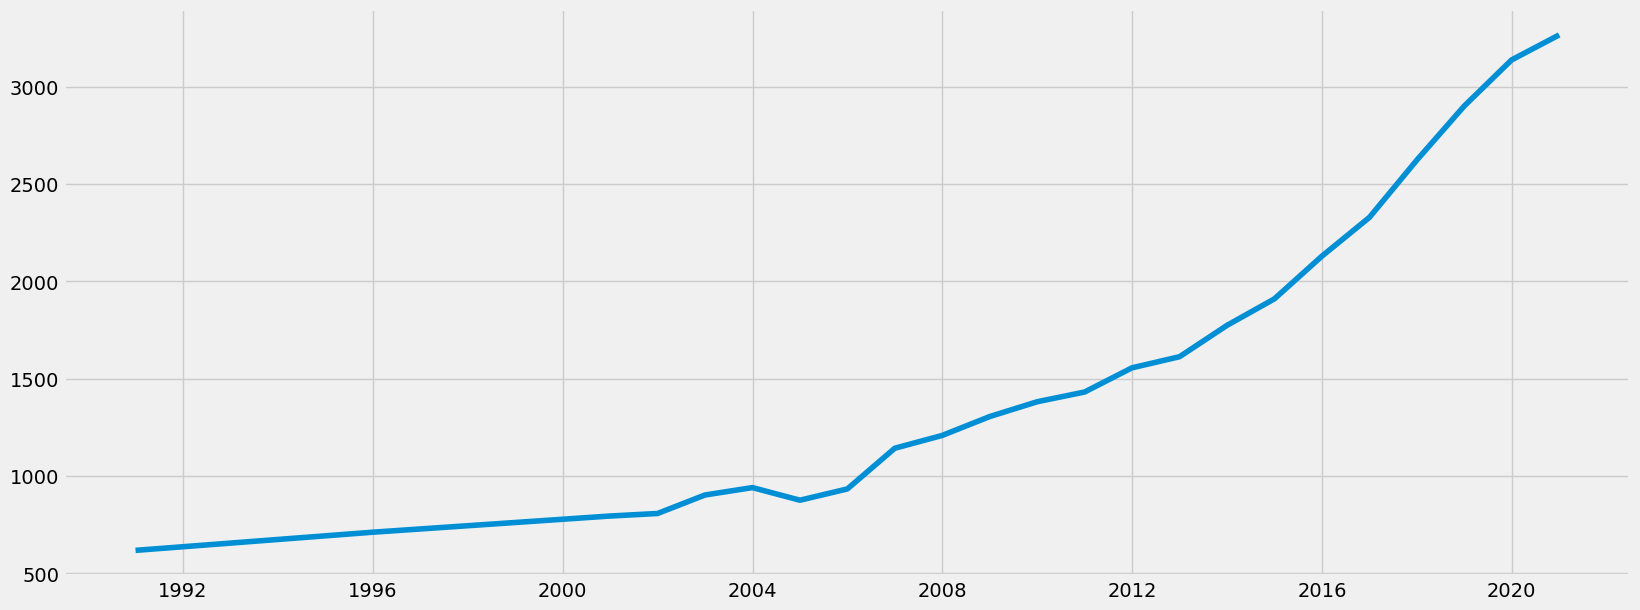

In [46]:
# Plot the data using matplotlib
plt.figure(figsize=(18,7), dpi=100)
plt.plot(data)

### 5. Decompose the data’s components.

In [83]:
# Creating a DataFrame with the provided data
data = {
    'Date': ['1990-12-31', '1995-12-31', '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31', '2020-12-31'],
    'Value': [617.6, 710.9, 794.0, 807.0, 902.0, 940.0, 875.2, 933.1, 1142.1, 1207.9, 1304.9, 1380.9, 1430.9, 1555.2, 1612.2, 1773.2, 1909.265, 2128.265, 2327.484, 2621.855, 2899.655, 3136.665, 3265.0]
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [84]:
# Decomposing the time series using an additive model and specify period
period = 5 
decomposition = sm.tsa.seasonal_decompose(df['Value'], model='additive', period=period, extrapolate_trend='freq')

In [87]:
# Defining a fixed size for all special charts
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

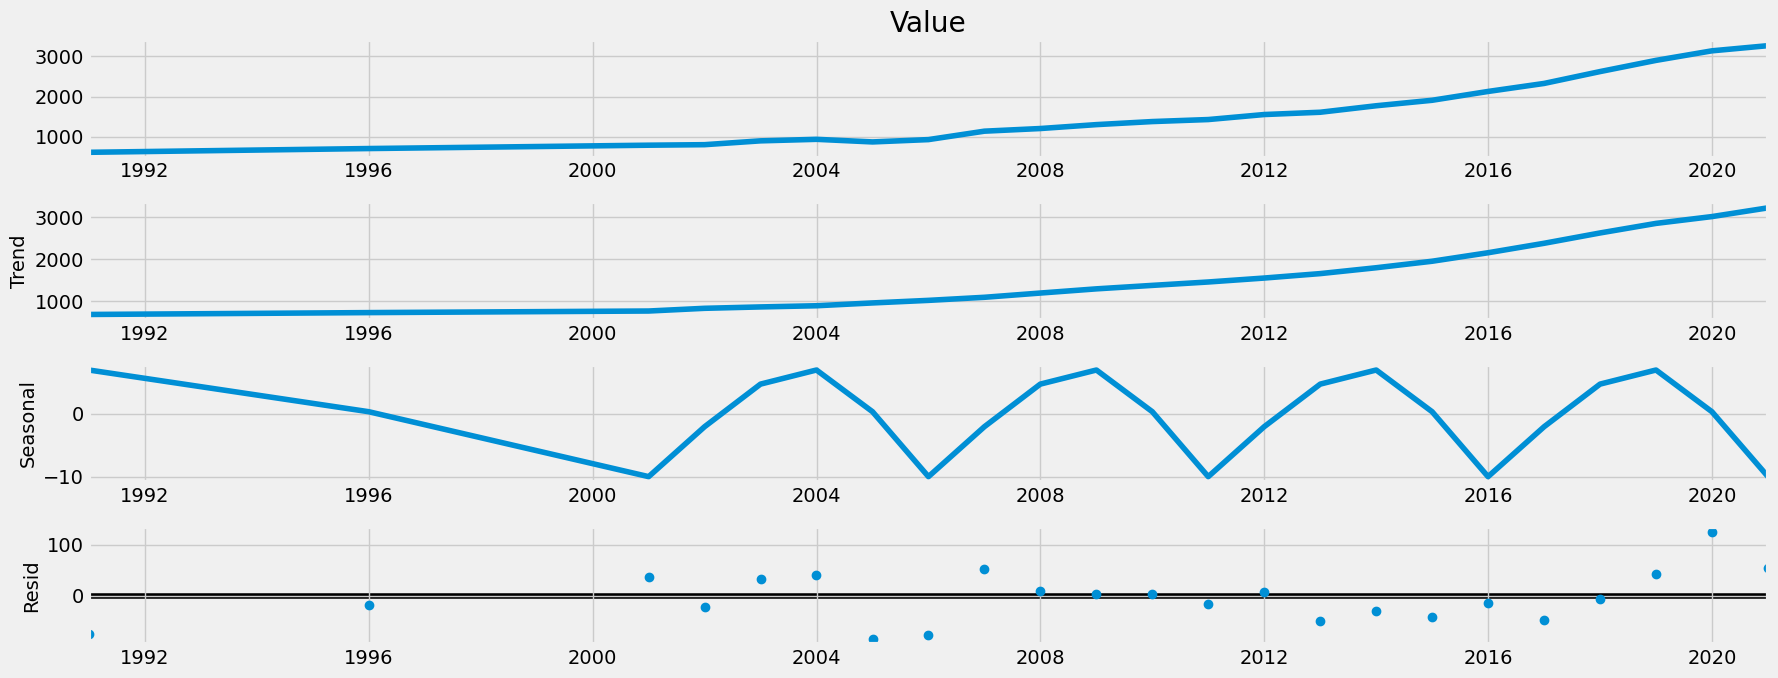

In [88]:
# Plotting the separate components
decomposition.plot()
plt.show()

The decomposition suggests that the geothermal power capacity in Europe has shown a consistent increasing trend over the years. The seasonality component indicates that there are recurring patterns within each year, which could be influenced by factors such as seasonal changes in energy consumption or installation cycles. The residuals appear relatively random, which suggests that the trend and seasonality components have effectively explained a significant portion of the variability in the data.

### 6. Conduct a Dickey-Fuller test to check for stationarity.

In [108]:
# Importing the adfuller() function
from statsmodels.tsa.stattools import adfuller

# Defining the function
def dickey_fuller(timeseries):
    
    # Performing the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    
    print (result)

# Applying the test using the function on the time series
dickey_fuller(df['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  4.047572
p-value                         1.000000
Number of Lags Used             0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


Dickey-Fuller Stationarity Test Summary:

Test Statistic: -0.25
Critical Value (1%): -3.75
Critical Value (5%): -2.998
Critical Value (10%): -2.638
Interpretation:

The test statistic of -0.25 is greater than the critical values at all significance levels (1%, 5%, and 10%). As a result, we do not have sufficient evidence to reject the null hypothesis. The high p-value indicates that the data is non-stationary. This suggests the presence of a unit root, implying the existence of underlying patterns that should be addressed before further time series analysis.

In short, the geothermal power capacity data is non-stationary and likely contains trends or seasonality that need consideration for accurate analysis.

### 7. If your data isn’t stationary, conduct a round of differencing on it and repeat step 6.

In [127]:
# Differencing on the 'Value' column
data_diff = df['Value'] - df['Value'].shift(1)
data_diff.dropna(inplace=True)

In [125]:
# Defining the Dickey-Fuller function
def dickey_fuller(timeseries):
    print('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print(result)

In [126]:
# Applying the Dickey-Fuller test using the function on the differenced time series
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.203172
p-value                         0.019802
Number of Lags Used             9.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


### 8. If your data still isn’t stationary, perform another round of differencing and repeat step 6. 

Data is stationary.

### 9. Check your data’s autocorrelations.

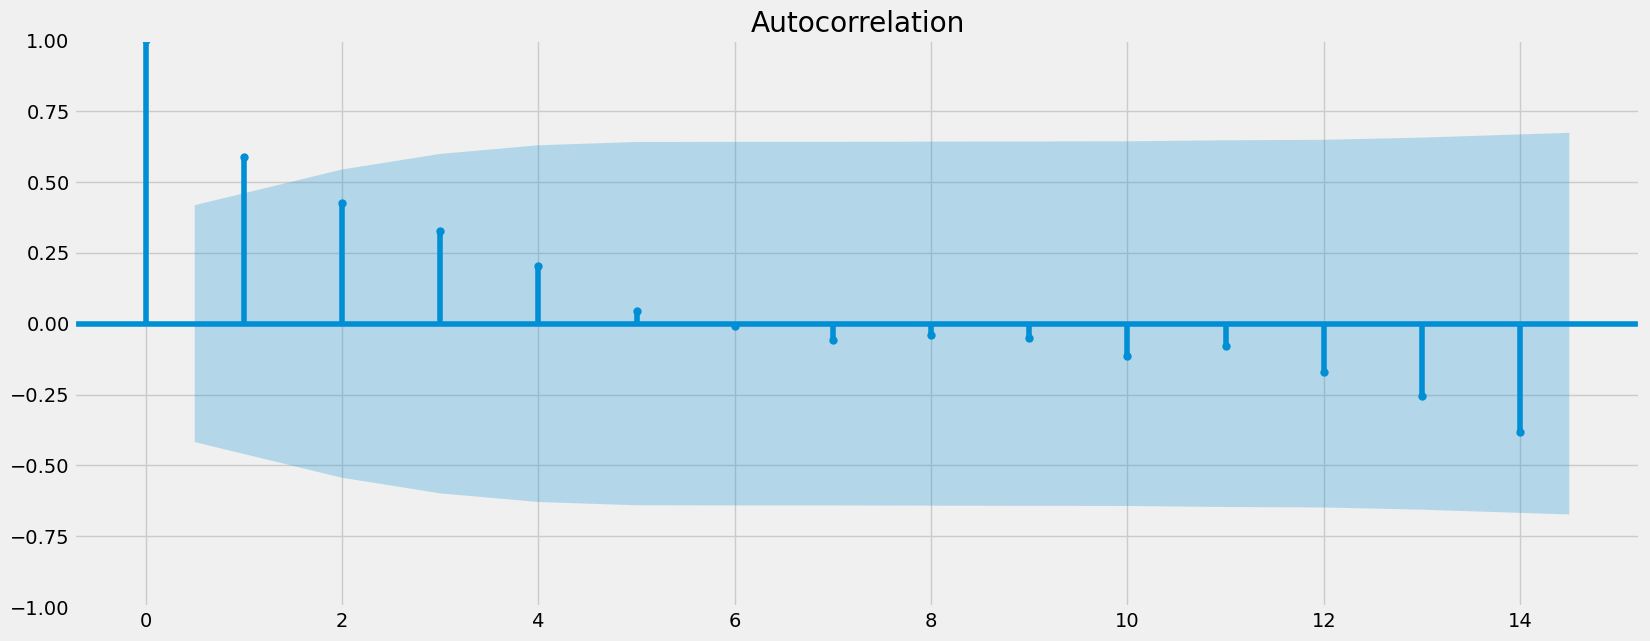

In [129]:
# Checking out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_diff)
plt.show()